In [1]:
!pip install patchify

In [2]:
!pip install sewar

  Preparing metadata (setup.py) ... done
  Created wheel for sewar: filename=sewar-0.4.5-py3-none-any.whl size=10608 sha256=02f92f4158d3141c4b2048ab4d83e6e3c3534c764b9116ef90e4a40ab7448536
  Stored in directory: /root/.cache/pip/wheels/7a/38/6b/d066cfcb2b1c1c9b059b9ce1bdc4803b469359214e8dad4e3e
Successfully built sewar


# Image Preprocessing

### Imports

In [1]:
import rasterio
import os
import shutil
import numpy as np
from rasterio.plot import show
from matplotlib import pyplot as plt
from patchify import patchify
import tifffile as tiff

### Reading Tiff Image Files

In [4]:
img1 = rasterio.open('../input/isro-satellite-data/k3_20191229071905_40634_06371168_l1g_nrg.tif')
img2 = rasterio.open('../input/isro-satellite-data/k3_20191229071905_40634_06371168_l1g_p.tif')

In [5]:
full_img_1 = img1.read()
full_img_2 = img2.read()

### Visualization

In [6]:
# def scaleCCC(x):
#     return((x - np.nanpercentile(x, 2))/(np.nanpercentile(x, 98) - np.nanpercentile(x,2)))

In [8]:
# r = full_img_1[0]
# g = full_img_1[1]
# b = full_img_1[2]

# rCCC = scaleCCC(r)
# gCCC = scaleCCC(g)
# bCCC = scaleCCC(b)

# rgbCCC = np.dstack((rCCC,gCCC,bCCC))
# plt.figure(figsize=(5, 5))
# plt.imshow(rgbCCC)
# plt.show()

In [9]:
# plt.figure(figsize=(5, 5))
# plt.imshow(scaleCCC(full_img_2[0]),cmap = 'gray')
# plt.show()

### Image Descriptions

In [10]:
# # No. Bands
# count1 = img1.count
# count2 = img2.count
# print('Image 1 bands: {count1} Image 2 bands: {count2}'.format(count1 = count1, count2 = count2))

In [11]:
# img1.meta

In [12]:
# img2.meta

### Creating Patches (Tiles)

In [6]:
new_img2 = ((full_img_2 - full_img_2.min()) * (1/(full_img_2.max() - full_img_2.min()) * 255))
new_img2 = new_img2.reshape(new_img2.shape[1],new_img2.shape[2])

In [7]:
new_img1_b1 = ((full_img_1[0] - full_img_1[0].min()) * (1/(full_img_1[0].max() - full_img_1[0].min()) * 255))
new_img1_b2 = ((full_img_1[1] - full_img_1[1].min()) * (1/(full_img_1[1].max() - full_img_1[1].min()) * 255))
new_img1_b3 = ((full_img_1[2] - full_img_1[2].min()) * (1/(full_img_1[2].max() - full_img_1[2].min()) * 255))
new_img1_3L = np.stack([new_img1_b1/3,new_img1_b2/3,new_img1_b2/3],axis = 2)
new_img1 = np.mean(new_img1_3L, axis=2)

In [8]:
if not os.path.isdir('patches/'):
    os.mkdir('patches/')
    
else:
    shutil.rmtree('patches/')
    os.mkdir('patches/')
    
if not os.path.isdir('patches/lr_image/'):
    os.mkdir('patches/lr_image/')
    

large_image = new_img1

patches_img = patchify(large_image, (64, 64), step=64) 

for i in range(patches_img.shape[0]):
    for j in range(patches_img.shape[1]):

        single_patch_img = patches_img[i,j,:,:]
        tiff.imwrite('patches/lr_image/' + 'image_' +  '0' + '_' + str(i)+str(j)+ ".tif", single_patch_img)

In [9]:
if not os.path.isdir('patches/hr_image/'):
    os.mkdir('patches/hr_image/')



large_image = new_img2

patches_img = patchify(large_image, (256, 256), step=256)

for i in range(patches_img.shape[0]):
    for j in range(patches_img.shape[1]):

        single_patch_img = patches_img[i,j,:,:]
        tiff.imwrite('patches/hr_image/' + 'image_' + '0' + '_' + str(i)+str(j)+ ".tif", single_patch_img) 

In [10]:
import gc
del(img1)
del(img2)
del(full_img_1)
del(full_img_2)
del(new_img1_3L)
del(new_img1_b1)
del(new_img1_b2)
del(new_img1_b3)
del(new_img1)
del(new_img2)
gc.collect()

115

### Patches(Tiles) Visualization

In [17]:
# lr_list = os.listdir('patches/lr_image/')
# hr_list = os.listdir('patches/hr_image/')
# lr_list.sort()
# hr_list.sort()

# lr_img_array_list = []
# hr_img_array_list = []
# lr_img_array_list_3L = []

# for hr_img in hr_list[0:5]:
#     hr_img_open = rasterio.open('patches/hr_image/' + hr_img)
#     lr_img_open = rasterio.open('patches/lr_image/' + hr_img)
#     hr_img_array = hr_img_open.read()
#     lr_img_array = lr_img_open.read()
#     lr_img_array_list.append(lr_img_array)
#     hr_img_array_list.append(hr_img_array)
    
    
#     fig, axes = plt.subplots(1,4,figsize=(20,20))
    
#     ax1 = axes[0]
#     ax1.set_axis_off()
#     ax1.imshow(hr_img_array[0],cmap = 'gray')
#     ax1.set_title('HR Image (Grayscale)')
    
#     ax2 = axes[1]
#     ax2.set_axis_off()
#     ax2.imshow(hr_img_array[0],cmap = 'Spectral')
#     ax2.set_title('HR Image (Spectral)')
    
#     ax3 = axes[2]
#     ax3.set_axis_off()
#     ax3.imshow(lr_img_array[0],cmap = 'gray')
#     ax3.set_title('LR Image (Grayscale)')
    
#     ax4 = axes[3]
#     ax4.set_axis_off()
#     ax4.imshow(lr_img_array[0],cmap = 'Spectral')
#     ax4.set_title('LR Image (Spectral)')
    

#     plt.show()

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, Model
from sklearn.model_selection import train_test_split

import tensorflow as tf
import numpy as np
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, PReLU,BatchNormalization, Flatten,MaxPooling2D, Lambda
from tensorflow.keras.layers import UpSampling2D, LeakyReLU, Dense, Input, add
from tqdm import tqdm

In [3]:
lr_list = os.listdir('patches/lr_image/')
hr_list = os.listdir('patches/hr_image/')
lr_list.sort()
hr_list.sort()

lr_images = []
for img in lr_list:
    img_lr =rasterio.open("patches/lr_image/" + img)
    img_lr = img_lr.read()
    img_lr = img_lr.reshape((img_lr.shape[1],img_lr.shape[2],img_lr.shape[0]))
    lr_images.append(img_lr)   

   
hr_images = []
for img in hr_list:
    img_hr =rasterio.open("patches/hr_image/" + img)
    img_hr = img_hr.read()
    img_hr = img_hr.reshape((img_hr.shape[1],img_hr.shape[2],img_hr.shape[0]))
    hr_images.append(img_hr)   

lr_images = np.array(lr_images)
hr_images = np.array(hr_images)

/opt/conda/lib/python3.7/site-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [13]:
def normalize_01(x):
    """Normalizes images to [0, 1]."""
    return x / 255.0


def normalize_m11(x):
    """Normalizes images to [-1, 1]."""
    return x / 127.5 - 1


def denormalize_m11(x):
    """Inverse of normalize_m11."""
    return (x + 1) * 127.5

def pixel_shuffle(scale):
    return lambda x: tf.nn.depth_to_space(x, scale)


In [4]:
#Define blocks to build the generator
def res_block(ip):
    
    res_model = Conv2D(64, (3,3), padding = "same")(ip)
    res_model = BatchNormalization(momentum = 0.5)(res_model)
    res_model = PReLU(shared_axes = [1,2])(res_model)
    
    res_model = Conv2D(64, (3,3), padding = "same")(res_model)
    res_model = BatchNormalization(momentum = 0.5)(res_model)
    
    return add([ip,res_model])

def upscale_block(ip):
    
    up_model = Conv2D(256, (3,3), padding="same")(ip)
    up_model = UpSampling2D( size = 2 )(up_model)
    up_model = PReLU(shared_axes=[1,2])(up_model)
    
    return up_model

#Generator model
def create_gen(gen_ip, num_res_block):
    layers = Conv2D(64, (9,9), padding="same")(gen_ip)
    layers = PReLU(shared_axes=[1,2])(layers)

    temp = layers

    for i in range(num_res_block):
        layers = res_block(layers)

    layers = Conv2D(64, (3,3), padding="same")(layers)
    layers = BatchNormalization(momentum=0.5)(layers)
    layers = add([layers,temp])

    layers = upscale_block(layers)
    layers = upscale_block(layers)

    op = Conv2D(3, (9,9), padding="same")(layers)
    return Model(inputs=gen_ip, outputs=op)

#Descriminator block that will be used to construct the discriminator
def discriminator_block(ip, filters, strides=1, bn=True):
    
    disc_model = Conv2D(filters, (3,3), strides = strides, padding="same")(ip)
    
    if bn:
        disc_model = BatchNormalization( momentum=0.5 )(disc_model)
    
    disc_model = LeakyReLU( alpha=0.2 )(disc_model)
    
    return disc_model


#Descriminartor, as described in the original paper
def create_disc(disc_ip):

    df = 64
    
    d1 = discriminator_block(disc_ip, df, bn=False)
    d2 = discriminator_block(d1, df, strides=2)
    d3 = discriminator_block(d2, df*2)
    d4 = discriminator_block(d3, df*2, strides=2)
    d5 = discriminator_block(d4, df*4)
    d6 = discriminator_block(d5, df*4, strides=2)
    d7 = discriminator_block(d6, df*8)
    d8 = discriminator_block(d7, df*8, strides=2)
    
    d8_5 = Flatten()(d8)
    d9 = Dense(df*16)(d8_5)
    d10 = LeakyReLU(alpha=0.2)(d9)
    validity = Dense(1, activation='sigmoid')(d10)

    return Model(disc_ip, validity)


#VGG19 
#We need VGG19 for the feature map obtained by the j-th convolution (after activation) 
#before the i-th maxpooling layer within the VGG19 network.(as described in the paper)
#Let us pick the 3rd block, last conv layer. 
#Build a pre-trained VGG19 model that outputs image features extracted at the
# third block of the model
# VGG architecture: https://github.com/keras-team/keras/blob/master/keras/applications/vgg19.py
from keras.applications.vgg19 import VGG19

def build_incep(hr_shape):
    
    incep = VGG19(weights="imagenet",include_top=False, input_shape=hr_shape)
    
    return Model(inputs=incep.inputs, outputs=incep.layers[3].output)

def gray_to_rgb(images):
    return  tf.image.grayscale_to_rgb(images)

def rgb_to_gray(images):
    return  tf.image.rgb_to_grayscale(images)

#Combined model
def create_comb(gen_model, disc_model, incep, lr_ip, hr_ip):
    gen_img = gen_model(lr_ip)
    lambda_layer = tf.keras.layers.Lambda(rgb_to_gray, name="lambda_layer")(gen_img)
    
    gen_features = incep(gen_img)
    
    #gray_fearures = tf.keras.layers.Lambda(rgb_to_gray, name="lambda_layer")(gen_features)
    
    disc_model.trainable = False
    validity = disc_model(lambda_layer)
    
    return Model(inputs=[lr_ip, hr_ip], outputs=[validity, gen_features])

# 2 losses... adversarial loss and content (VGG) loss
#AdversariaL: is defined based on the probabilities of the discriminator over all training samples
# use binary_crossentropy

#Content: feature map obtained by the j-th convolution (after activation) 
#before the i-th maxpooling layer within the VGG19 network.
# MSE between the feature representations of a reconstructed image
# and the reference image. 

In [5]:
#Split to train and test
lr_train, lr_test, hr_train, hr_test = train_test_split(lr_images, hr_images, 
                                                      test_size=0.33, random_state=42)



hr_shape = (hr_train.shape[1], hr_train.shape[2], hr_train.shape[3])
lr_shape = (lr_train.shape[1], lr_train.shape[2], lr_train.shape[3])

lr_ip = Input(shape=lr_shape,batch_size = 1)
hr_ip = Input(shape=hr_shape,batch_size = 1)

generator = create_gen(lr_ip, num_res_block = 16)
generator.summary()

discriminator = create_disc(hr_ip)
discriminator.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
discriminator.summary()

incep = build_incep((256,256,3))
print(incep.summary())
incep.trainable = False

gan_model = create_comb(generator, discriminator, incep, lr_ip, hr_ip)

# 2 losses... adversarial loss and content (VGG) loss
#AdversariaL: is defined based on the probabilities of the discriminator over all training samples
# use binary_crossentropy

#Content: feature map obtained by the j-th convolution (after activation) 
#before the i-th maxpooling layer within the VGG19 network.
# MSE between the feature representations of a reconstructed image
# and the reference image. 
gan_model.compile(loss=["binary_crossentropy", "mse"], loss_weights=[1e-3, 1], optimizer="adam")
gan_model.summary()

2022-08-26 09:52:29.518991: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-26 09:52:29.613788: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-26 09:52:29.614602: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-26 09:52:29.616613: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(1, 64, 64, 1)]     0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (1, 64, 64, 64)      5248        input_1[0][0]                    
__________________________________________________________________________________________________
p_re_lu (PReLU)                 (1, 64, 64, 64)      64          conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (1, 64, 64, 64)      36928       p_re_lu[0][0]                    
______________________________________________________________________________________________

In [7]:
#Create a list of images for LR and HR in batches from which a batch of images
#would be fetched during training. 
batch_size = 1  
train_lr_batches = []
train_hr_batches = []
for it in range(int(hr_train.shape[0] / batch_size)):
    start_idx = it * batch_size
    end_idx = start_idx + batch_size
    train_hr_batches.append(hr_train[start_idx:end_idx])
    train_lr_batches.append(lr_train[start_idx:end_idx])

In [ ]:
epochs = 50
#Enumerate training over epochs
for e in range(epochs):
    
    fake_label = np.zeros((batch_size, 1)) # Assign a label of 0 to all fake (generated images)
    real_label = np.ones((batch_size,1)) # Assign a label of 1 to all real images.
    
    #Create empty lists to populate gen and disc losses. 
    g_losses = []
    d_losses = []
    
    def gray_to_rgb(images):
        img = tf.convert_to_tensor(images, dtype=tf.int64) 
        return  tf.image.grayscale_to_rgb(img).numpy()

    def rgb_to_gray(images):
        return  tf.image.rgb_to_grayscale(images).numpy()
    
    #Enumerate training over batches. 
    for b in tqdm(range(len(train_hr_batches))):
        lr_imgs = train_lr_batches[b] #Fetch a batch of LR images for training
        hr_imgs = train_hr_batches[b] #Fetch a batch of HR images for training
        
        fake_imgs = generator.predict_on_batch(lr_imgs) #Fake images
        gen_imgs = rgb_to_gray(fake_imgs)
        
        #First, train the discriminator on fake and real HR images. 
        discriminator.trainable = True
        d_loss_gen = discriminator.train_on_batch(gen_imgs, fake_label)
        d_loss_real = discriminator.train_on_batch(hr_imgs, real_label)
        
        #Now, train the generator by fixing discriminator as non-trainable
        discriminator.trainable = False
        
        #Average the discriminator loss, just for reporting purposes. 
        d_loss = 0.5 * np.add(d_loss_gen, d_loss_real) 
        
        #Extract VGG features, to be used towards calculating loss
        image_features = incep.predict(gray_to_rgb(hr_imgs))
     
        #Train the generator via GAN. 
        #Remember that we have 2 losses, adversarial loss and content (VGG) loss
        g_loss, _, _ = gan_model.train_on_batch([lr_imgs, hr_imgs], [real_label, image_features])
        
        #Save losses to a list so we can average and report. 
        d_losses.append(d_loss)
        g_losses.append(g_loss)
        
    #Convert the list of losses to an array to make it easy to average    
    g_losses = np.array(g_losses)
    d_losses = np.array(d_losses)
    
    #Calculate the average losses for generator and discriminator
    g_loss = np.sum(g_losses, axis=0) / len(g_losses)
    d_loss = np.sum(d_losses, axis=0) / len(d_losses)
    
    #Report the progress during training. 
    print("epoch:", e+1 ,"g_loss:", g_loss, "d_loss:", d_loss)

    if (e+1) % 5 == 0: #Change the frequency for model saving, if needed
        #Save the generator after every n epochs (Usually 10 epochs)
        generator.save("gen_e_"+ str(e+1) +".h5")

  0%|          | 0/3528 [00:00<?, ?it/s]2022-08-26 09:52:56.582214: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-08-26 09:52:57.727245: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005
100%|██████████| 3528/3528 [13:08<00:00,  4.47it/s]


epoch: 1 g_loss: 216.90778628647192 d_loss: [2.73086453 0.85501701]


100%|██████████| 3528/3528 [12:54<00:00,  4.56it/s]


epoch: 2 g_loss: 177.93122340559688 d_loss: [0.89392123 0.99305556]


100%|██████████| 3528/3528 [12:55<00:00,  4.55it/s]


epoch: 3 g_loss: 169.91019052294106 d_loss: [1.49410108 0.99263039]


100%|██████████| 3528/3528 [12:58<00:00,  4.53it/s]


epoch: 4 g_loss: 164.85023654872327 d_loss: [0.55702366 0.99688209]


100%|██████████| 3528/3528 [12:57<00:00,  4.54it/s]
/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


epoch: 5 g_loss: 160.88350972526467 d_loss: [1.08946798 0.98979592]


100%|██████████| 3528/3528 [12:56<00:00,  4.54it/s]


epoch: 6 g_loss: 1456.4353179293696 d_loss: [0.26548226 0.99532313]


100%|██████████| 3528/3528 [12:53<00:00,  4.56it/s]


epoch: 7 g_loss: 206.25291359370527 d_loss: [0.45758402 0.99674036]


100%|██████████| 3528/3528 [12:52<00:00,  4.57it/s]


epoch: 8 g_loss: 170.4701771563143 d_loss: [0.54578747 0.99702381]


100%|██████████| 3528/3528 [12:55<00:00,  4.55it/s]


epoch: 9 g_loss: 163.26694781669414 d_loss: [0.21142863 0.9981576 ]


100%|██████████| 3528/3528 [12:57<00:00,  4.54it/s]


epoch: 10 g_loss: 160.1303536387798 d_loss: [6.39572191e-25 1.00000000e+00]


100%|██████████| 3528/3528 [12:57<00:00,  4.54it/s]


epoch: 11 g_loss: 157.83319082187145 d_loss: [0.20526656 0.99872449]


100%|██████████| 3528/3528 [12:56<00:00,  4.55it/s]


epoch: 12 g_loss: 419.27302261234144 d_loss: [0.7951097  0.99546485]


100%|██████████| 3528/3528 [12:56<00:00,  4.54it/s]


epoch: 13 g_loss: 169.81792728092665 d_loss: [2.86963024e-10 1.00000000e+00]


100%|██████████| 3528/3528 [13:03<00:00,  4.50it/s]


epoch: 14 g_loss: 160.13175389677488 d_loss: [2.58195689e-10 1.00000000e+00]


100%|██████████| 3528/3528 [12:56<00:00,  4.54it/s]


epoch: 15 g_loss: 1020.8814940009257 d_loss: [0.13165018 0.99900794]


100%|██████████| 3528/3528 [12:59<00:00,  4.53it/s]


epoch: 16 g_loss: 178.53362048131808 d_loss: [0. 1.]


100%|██████████| 3528/3528 [12:57<00:00,  4.54it/s]


epoch: 17 g_loss: 160.9615320438971 d_loss: [0. 1.]


 91%|█████████ | 3209/3528 [11:51<01:25,  3.75it/s]

In [9]:
generator.save("gen_e_"+ '5' +".h5")

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


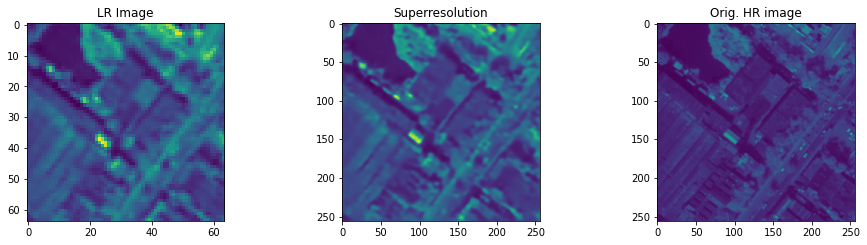

In [22]:
#Test - perform super resolution using saved generator model
from keras.models import load_model
from numpy.random import randint

generator = load_model('../input/vgg5-model/gen_e_15.h5', compile=False)

def rgb_to_gray(images):
    return  tf.image.rgb_to_grayscale(images).numpy()

[X1, X2] = [lr_test, hr_test]
# select random example
ix = np.array([7])
src_image, tar_image = X1[ix], X2[ix]

# generate image from source
gen_image = rgb_to_gray(generator.predict(src_image))

cv2.imwrite('SR_IMG_VGG5_3.tif', gen_image.reshape(256,256,1))

cv2.imwrite('LR_IMG_VGG5_3.tif', src_image.reshape(64,64,1))

cv2.imwrite('HR_IMG_VGG5_3.tif', tar_image.reshape(256,256,1))

# plot all three images

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('LR Image')
plt.imshow(src_image[0,:,:,:])
plt.subplot(232)
plt.title('Superresolution')
plt.imshow(gen_image[0,:,:,:])
plt.subplot(233)
plt.title('Orig. HR image')
plt.imshow(tar_image[0,:,:,:])

plt.show()

In [9]:
SIZE = 256

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE,SIZE, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
 
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding = 'same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 256, 256, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 128, 128, 8)       2312      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 64, 64, 8)         584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 32, 32, 8)         5

In [14]:
lr_train[1].shape

(64, 64, 1)

In [18]:
len(gen_images)

3528

In [10]:
import gc
del(lr_images)
del(hr_images)
gc.collect()

8880

In [12]:
gen_images = []
for i in range(len(lr_train)):
    gen_image = rgb_to_gray(generator.predict(lr_train[i]))
    gen_images.append(gen_image)
    
gen_test = []
for i in range(len(lr_test)):
    gen_image = rgb_to_gray(generator.predict(lr_test[i]))
    gen_test.append(gen_image)
    
gen_images = np.reshape(gen_images, (len(gen_images), 256, 256, 1))
gen_test = np.reshape(gen_test, (len(gen_test), 256, 256, 1))

hr_train = np.reshape(hr_train, (len(hr_train), 256, 256, 1))
hr_test = np.reshape(hr_test, (len(hr_test), 256, 256, 1))

2022-08-22 15:51:13.357113: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-08-22 15:51:14.908841: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


In [12]:
from keras.models import load_model
generator = load_model('../input/models-new/gen_e_40.h5', compile=False)

def rgb_to_gray(images):
    return  tf.image.rgb_to_grayscale(images).numpy()

model.fit(gen_images, hr_train, epochs=10, batch_size=1, shuffle=True, validation_data=(gen_test, hr_test))


2022-08-22 15:33:43.065721: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 924844032 exceeds 10% of free system memory.
2022-08-22 15:33:44.715685: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 924844032 exceeds 10% of free system memory.
2022-08-22 15:33:45.735846: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 924844032 exceeds 10% of free system memory.
2022-08-22 15:33:46.481152: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 924844032 exceeds 10% of free system memory.


Epoch 1/10
3524/3528 [============================>.] - ETA: 0s - loss: 48.5602

2022-08-22 15:34:02.815551: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 455606272 exceeds 10% of free system memory.


3528/3528 [==============================] - 21s 6ms/step - loss: 48.5538 - val_loss: 39.8763
Epoch 2/10
3528/3528 [==============================] - 17s 5ms/step - loss: 39.0434 - val_loss: 37.7815
Epoch 3/10
3528/3528 [==============================] - 18s 5ms/step - loss: 37.0514 - val_loss: 36.0316
Epoch 4/10
3528/3528 [==============================] - 18s 5ms/step - loss: 36.0133 - val_loss: 34.2070
Epoch 5/10
3528/3528 [==============================] - 18s 5ms/step - loss: 35.2986 - val_loss: 34.0750
Epoch 6/10
3528/3528 [==============================] - 19s 5ms/step - loss: 34.2887 - val_loss: 33.4824
Epoch 7/10
3528/3528 [==============================] - 18s 5ms/step - loss: 33.6413 - val_loss: 35.3238
Epoch 8/10
3528/3528 [==============================] - 17s 5ms/step - loss: 32.8644 - val_loss: 31.4457
Epoch 9/10
3528/3528 [==============================] - 18s 5ms/step - loss: 32.3843 - val_loss: 31.8591
Epoch 10/10
3528/3528 [==============================] - 18s 5ms/s

In [13]:
model.save('denoising_autoencoder.model')

2022-08-22 15:40:56.544423: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


55/55 [==============================] - 2s 22ms/step - loss: 629.7665


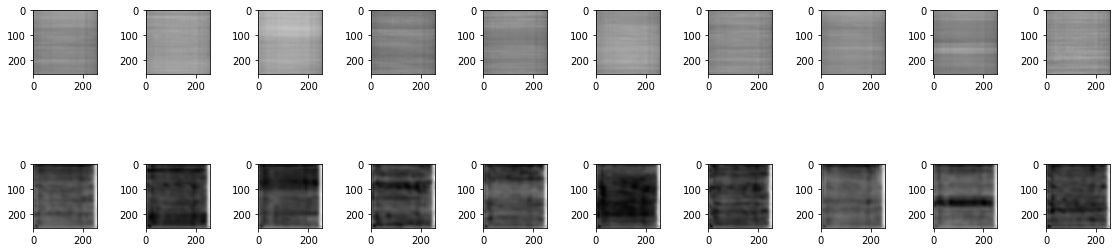

In [13]:
import keras
model = keras.models.load_model('./denoising_autoencoder.model')
model.evaluate(gen_test, hr_test)

no_noise_img = model.predict(gen_test)

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(gen_test[i].reshape(256, 256), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(256, 256), cmap="binary")

plt.show()

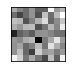

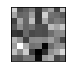

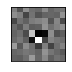

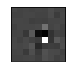

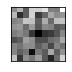

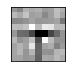

In [24]:
### Visualization of 3rd Layer Filter Kernel
filters, biases = generator.layers[1].get_weights()
# normalizing filter values to 0-1 for visualization
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# ploting first few filters (1-6)
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    plt.figure(figsize=(7, 7))
    for j in range(1):
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
plt.show()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(1, 64, 64, 1)]          0         
_________________________________________________________________
conv2d (Conv2D)              (1, 64, 64, 64)           5248      
Total params: 5,248
Trainable params: 5,248
Non-trainable params: 0
_________________________________________________________________


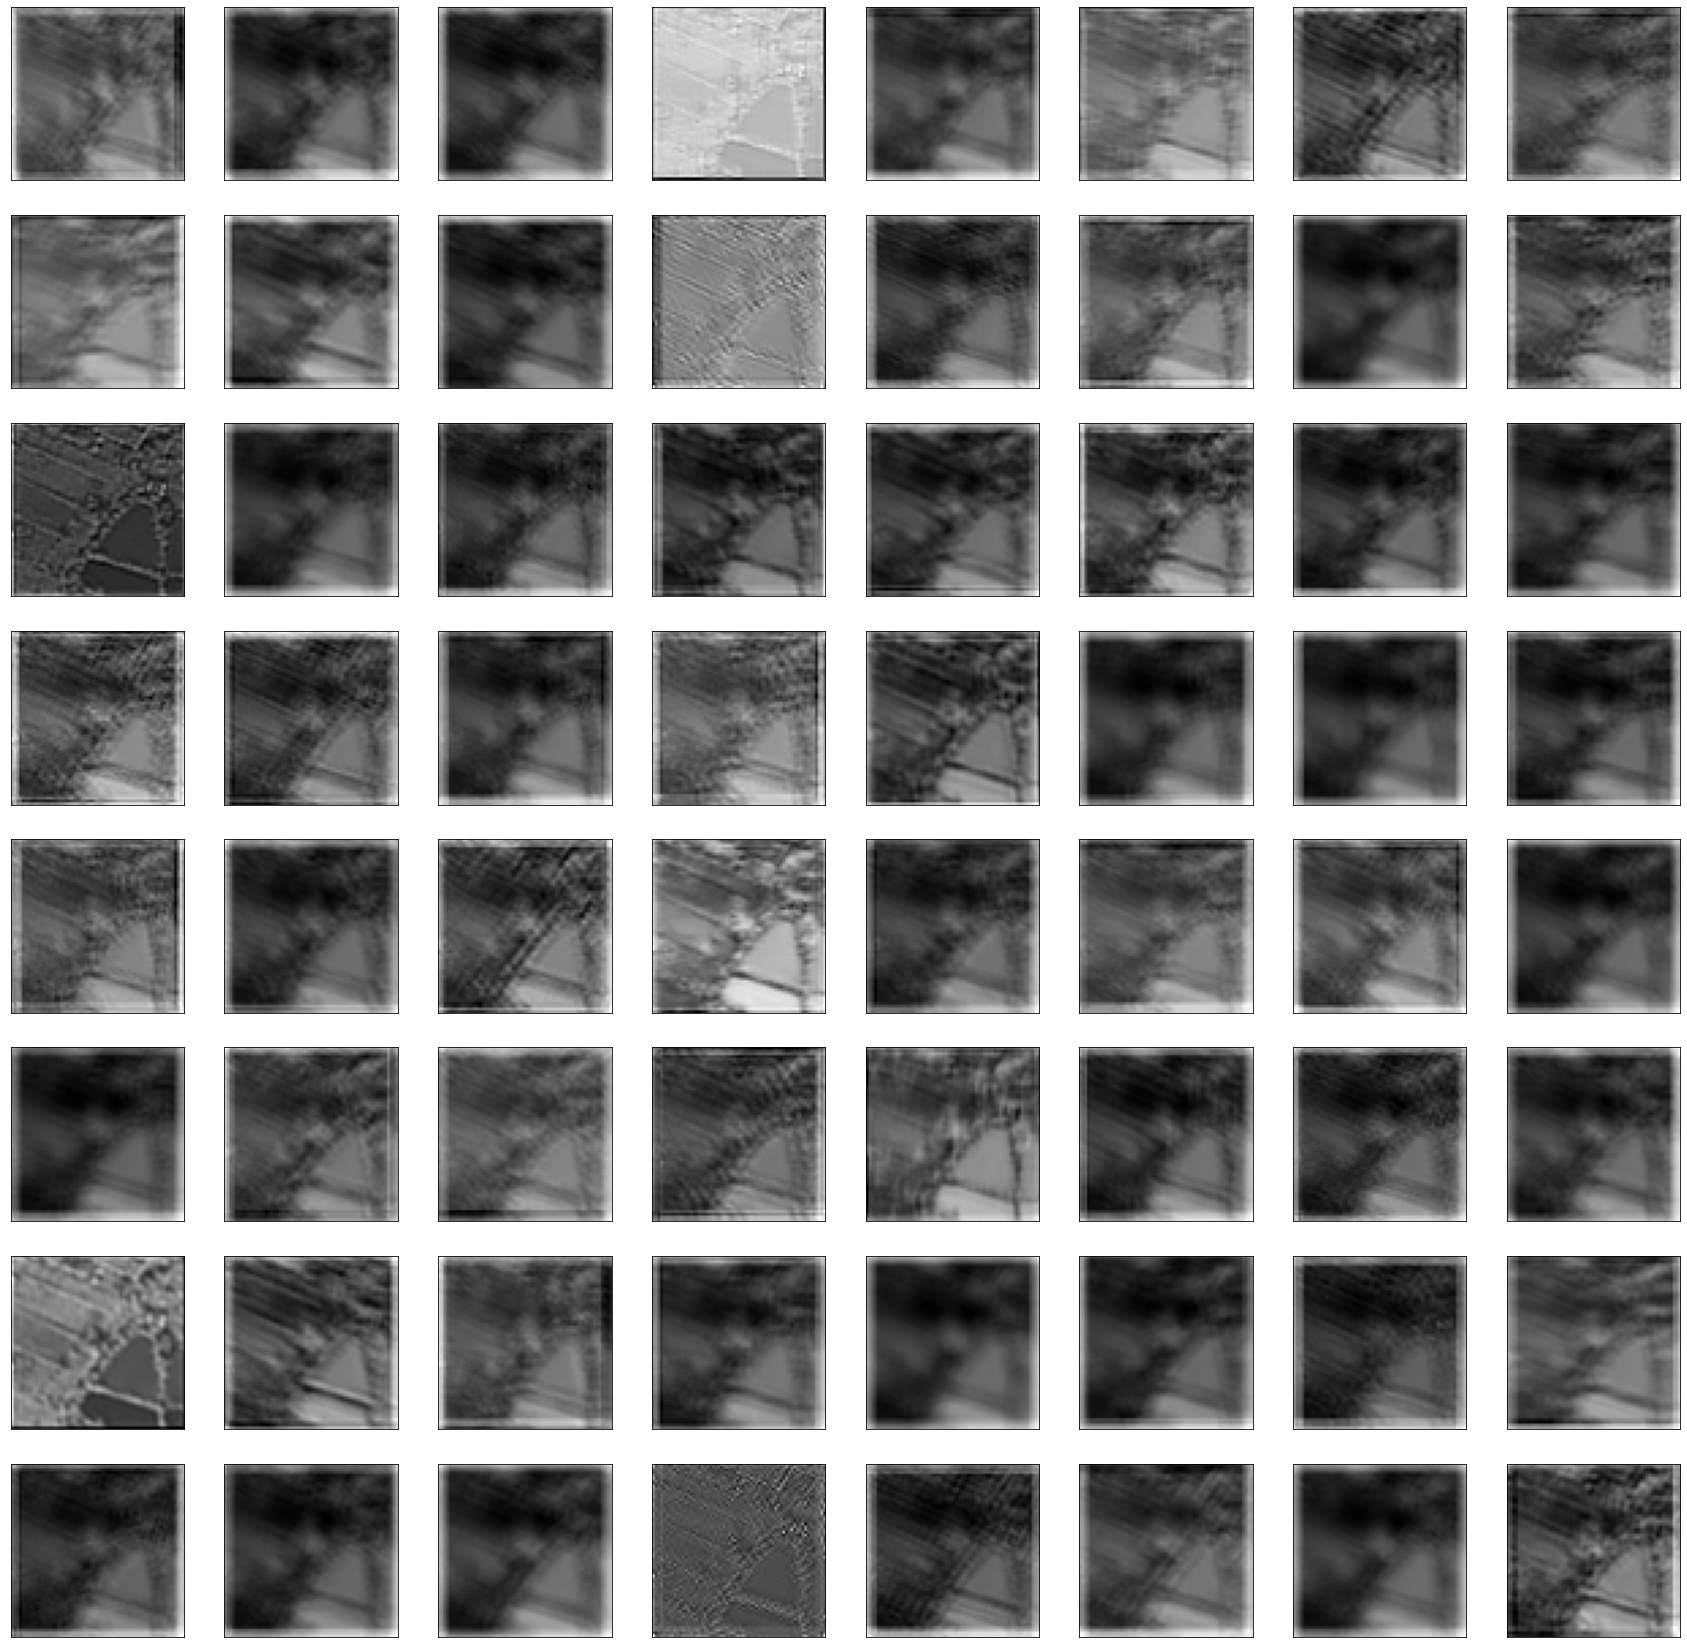

In [18]:
### Visualization of 2nd Layer Feaure Map
model_check = Model(inputs=generator.inputs, outputs=generator.layers[1].output)
model_check.summary()

img = np.expand_dims(lr_test[2], axis=0)
feature_maps = model_check.predict(img)
square = 8
ix = 1
plt.figure(figsize=(30, 30))
for _ in range(square):
    for _ in range(square):
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in spectral
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
plt.show()

# Pretrained Model Testing

### Downloading Models

### Peak Signal-to-Noise Ratio (PSNR) Comperison:

In [ ]:
from math import log10, sqrt

psnr_list = []

input_folder = '/LowResImages/'
original_folder = '/OriginalImages/'
result_edsr = '/results/EDSR-New/'
result_presrgan = '/results/PRE-New/'
result_srgan =  '/results/GAN-New/'
results_bicubic = '/results/Bicubic/'


input_list = []
original_list = []
output_edsr = []
output_presgan = []
output_srgan =[]
output_bicubic = []

for img in images:
    input_list.append(input_folder+img)
    original_list.append(original_folder+img)
    output_edsr.append(result_edsr+img)
    output_presgan.append(result_presrgan + img)
    output_srgan.append(result_srgan + img)
    output_bicubic.append(results_bicubic + img)
    
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0): 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
  
def psnr(original_img,img1,img2,img3,img4):
    psnr1 = PSNR(original_img, img1)
    psnr2 = PSNR(original_img, img2)
    psnr3 = PSNR(original_img, img3)
    psnr4 = PSNR(original_img, img4)
    psnr_list.append([psnr1,psnr2,psnr3,psnr4])
    
for input_path,original_path,out_edsr,out_pre,out_gan,out_bi in zip(input_list,original_list,output_edsr,output_presgan,output_srgan,output_bicubic):
  img_input = imread_hr(input_path)
  img_original = imread_hr(original_path)
  img_edsr = imread_hr(out_edsr)
  img_pre = imread_hr(out_pre)
  img_gan = imread_hr(out_gan)
  img_bi = imread_hr_bi(out_bi)
  psnr(img_original,img_bi,img_edsr,img_pre,img_gan)
    
df_psnr_new = pd.DataFrame(psnr_list, columns = ['Bicubic','EDSR','SR(PRE)','SR(GAN)'])
df_psnr_new['Image']=['Image 1','Image 2','Image 3','Image 4','Image 5']
df_psnr_new['Avg'] = np.mean(psnr_list,axis = 1)
df_psnr_new.set_index('Image',inplace = True)
df_psnr_new.style.set_caption("PSNR Table")

### Structural Similarity Index (SSIM) Comperison:

In [ ]:
from skimage.metrics import structural_similarity
score = []


input_folder = '/LowResImages/'
original_folder = '/OriginalImages/'
result_edsr = '/results/EDSR-New/'
result_presrgan = '/results/PRE-New/'
result_srgan =  '/results/GAN-New/'
results_bicubic = '/results/Bicubic/'


input_list = []
original_list = []
output_edsr = []
output_presgan = []
output_srgan =[]
output_bicubic = []

for img in images:
    input_list.append(input_folder+img)
    original_list.append(original_folder+img)
    output_edsr.append(result_edsr+img)
    output_presgan.append(result_presrgan + img)
    output_srgan.append(result_srgan + img)
    output_bicubic.append(results_bicubic + img)

def ssim(original_img,img1,img2,img3,img4):
    score1 = structural_similarity(original_img, img1, data_range=img1.max() - img1.min())
    score2 = structural_similarity(original_img, img2, data_range=img2.max() - img2.min())
    score3 = structural_similarity(original_img, img3, data_range=img3.max() - img3.min())
    score4 = structural_similarity(original_img, img4, data_range=img4.max() - img4.min())
    score.append([score1,score2,score3,score4])
    
for input_path,original_path,out_edsr,out_pre,out_gan,out_bi in zip(input_list,original_list,output_edsr,output_presgan,output_srgan,output_bicubic):
  img_input = imread_hr(input_path)
  img_original = imread_hr(original_path)
  img_edsr = imread_hr(out_edsr)
  img_pre = imread_hr(out_pre)
  img_gan = imread_hr(out_gan)
  img_bi = imread_hr_bi(out_bi)
  ssim(img_original,img_bi,img_edsr,img_pre,img_gan)
    
df_ssim_new = pd.DataFrame(score, columns = ['Bicubic','EDSR','SR(PRE)','SR(GAN)'])
df_ssim_new['Image']=['Image 1','Image 2','Image 3','Image 4','Image 5']
df_ssim_new['Avg'] = np.mean(score,axis = 1)
df_ssim_new.set_index('Image',inplace = True)
df_ssim_new.style.set_caption("SSIM Table")